# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | corinto
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | napier
Processing Record 11 of Set 1 | saint joseph
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | puerto armuelles
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | thompson
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,56.41,95,97,23.73,SH,1722901115
1,bilibino,68.0546,166.4372,40.82,57,95,1.14,RU,1722901117
2,blackmans bay,-43.0167,147.3167,50.74,68,100,1.01,AU,1722901118
3,longyearbyen,78.2186,15.6401,48.04,87,75,10.36,SJ,1722901119
4,waitangi,-43.9535,-176.5597,50.83,85,56,5.01,NZ,1722901121


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,56.41,95,97,23.73,SH,1722901115
1,bilibino,68.0546,166.4372,40.82,57,95,1.14,RU,1722901117
2,blackmans bay,-43.0167,147.3167,50.74,68,100,1.01,AU,1722901118
3,longyearbyen,78.2186,15.6401,48.04,87,75,10.36,SJ,1722901119
4,waitangi,-43.9535,-176.5597,50.83,85,56,5.01,NZ,1722901121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

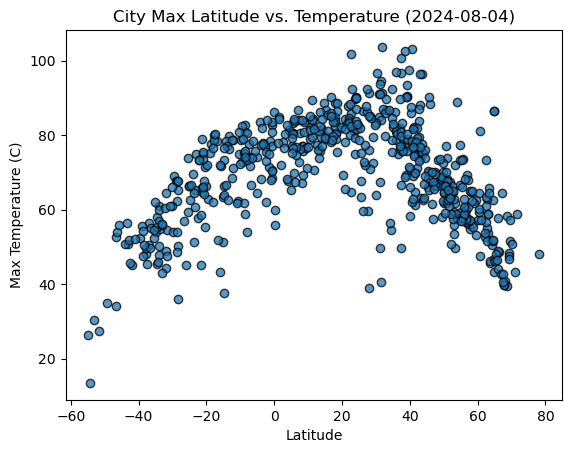

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-08-04)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

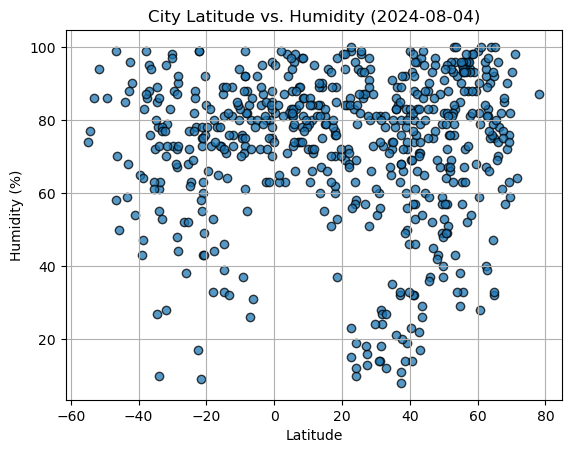

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-08-04)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

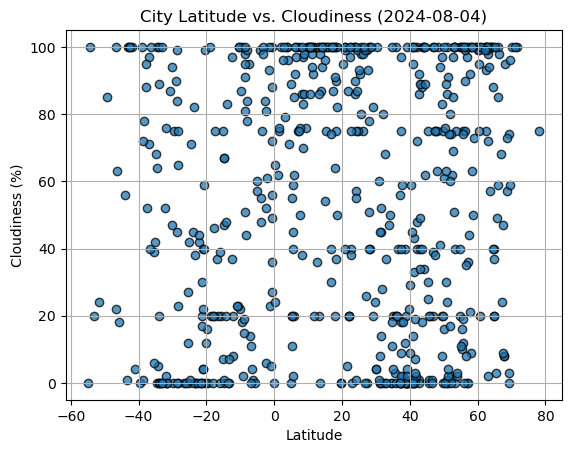

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-08-04)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

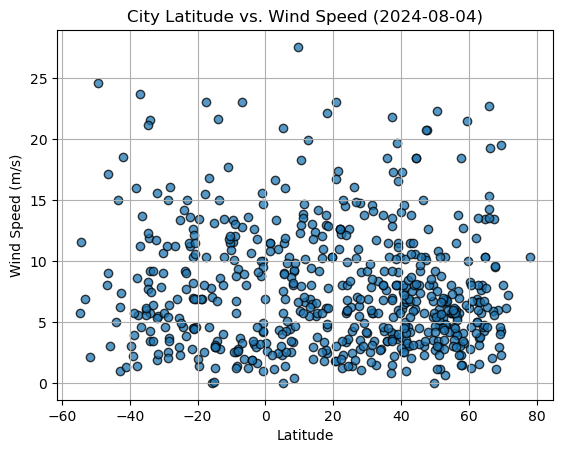

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-08-04)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def linear_regression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_equation

def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b), fontsize=15,color="red")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,40.82,57,95,1.14,RU,1722901117
3,longyearbyen,78.2186,15.6401,48.04,87,75,10.36,SJ,1722901119
5,corinto,37.9407,22.9573,78.89,66,2,4.00,GR,1722901122
7,udachny,66.4167,112.4000,48.60,78,98,19.28,RU,1722901124
9,saint joseph,39.7686,-94.8466,97.38,46,0,10.36,US,1722901050


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,56.41,95,97,23.73,SH,1722901115
2,blackmans bay,-43.0167,147.3167,50.74,68,100,1.01,AU,1722901118
4,waitangi,-43.9535,-176.5597,50.83,85,56,5.01,NZ,1722901121
6,luderitz,-26.6481,15.1594,56.84,52,0,11.25,NaN,1722901123
8,napier,-39.4833,176.9167,52.29,65,0,3.00,NZ,1722901125


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.62


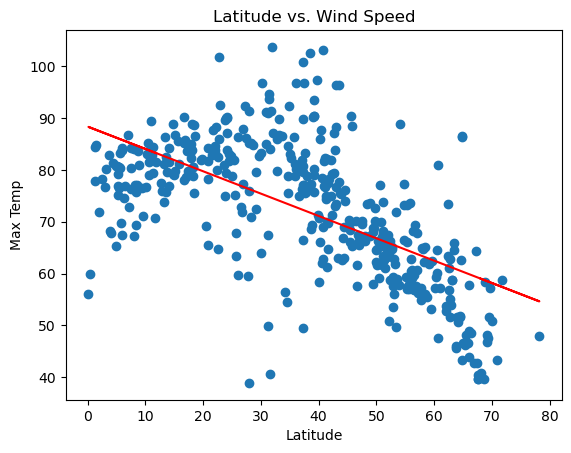

In [26]:
# Linear regression on Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Wind Speed")
plt.show()

The r-value is : 0.78


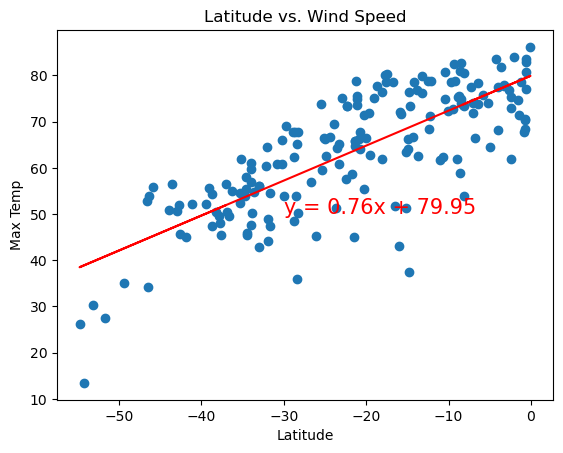

In [24]:
# Linear regression on Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -30, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()

**Discussion about the linear relationship:** For the southern hemisphere, there is a moderate positive correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : -0.03


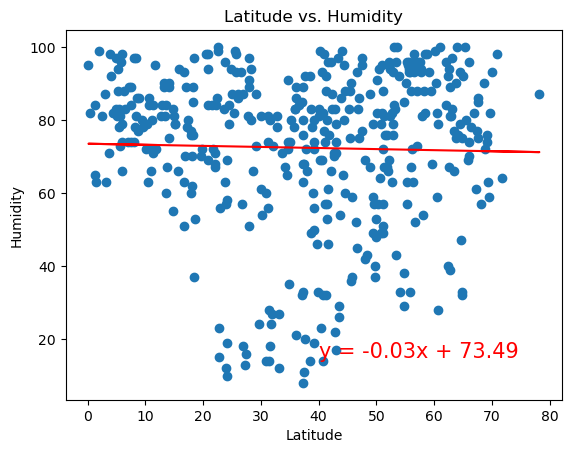

In [27]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 40, 15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

The r-value is : 0.05


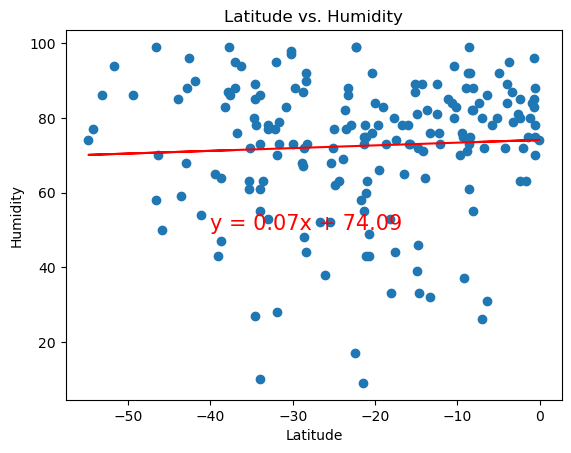

In [28]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -40, 50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

**Discussion about the linear relationship:** For the southern hemisphere, there is a moderate positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : -0.11


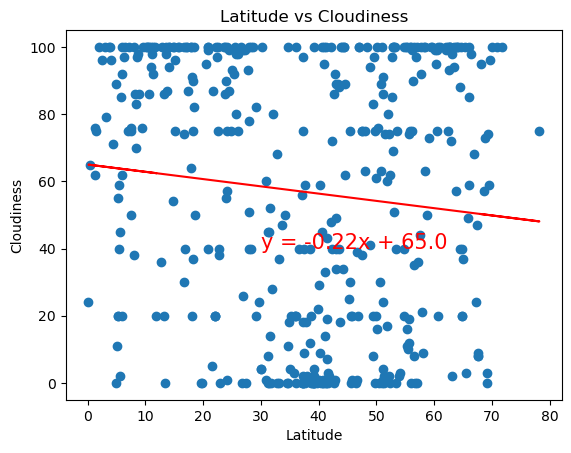

In [29]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 30, 40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.show()

The r-value is : 0.03


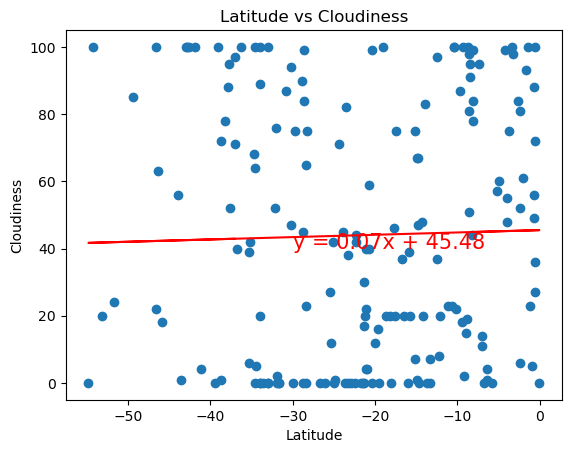

In [30]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -30, 40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** For the southern hemisphere, there is a weak positive correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.09


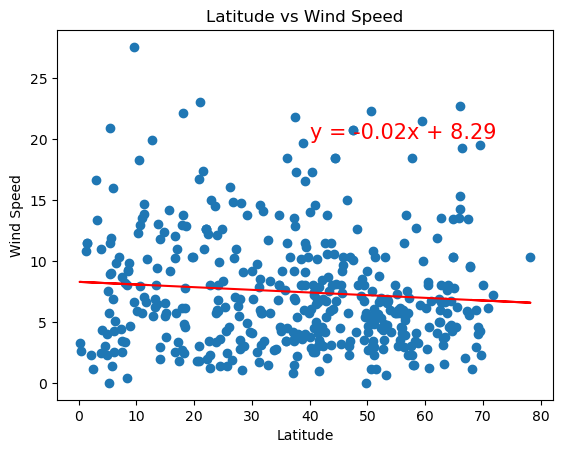

In [31]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 40, 20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

The r-value is : -0.08


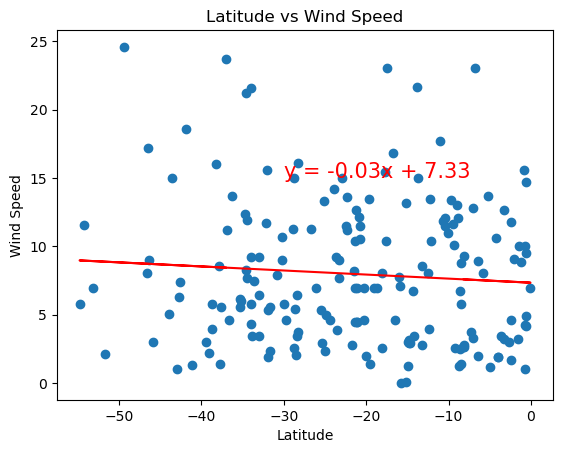

In [32]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -30, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** For the southern hemisphere, there is a weak negative correlation between latitude and wind speed.